Install the dependencies:

In [1]:
!pip install torch
!pip install torchvision

Download object detection image:

In [2]:
import os.path
import requests
import cv2

image_file_path = 'source_2.png'
if not os.path.isfile(image_file_path):
    url = 'https://github.com/ivan-vasilev/Python-Deep-Learning-3rd-Edition/blob/main/Chapter05/source_2.png?raw=true'
    r = requests.get(url)
    with open(image_file_path, 'wb') as f:
        f.write(r.content)

image = cv2.imread(image_file_path)

Load the pytorch model with ResNet50 backbone:

In [3]:
from torchvision.models.detection import \
    maskrcnn_resnet50_fpn_v2, \
    MaskRCNN_ResNet50_FPN_V2_Weights

model = maskrcnn_resnet50_fpn_v2(
    weights=MaskRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

# set the model in evaluation mode
model.eval()

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_v2_coco-73cbd019.pth
100%|██████████| 177M/177M [00:02<00:00, 80.9MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
         

Transform the input image to tensor:

In [4]:
import torchvision.transforms as transforms

transform = transforms.ToTensor()

nn_input = transform(image)

Run the model:

In [5]:
segmented_objects = model([nn_input])
print(segmented_objects)

[{'boxes': tensor([[6.4227e+02, 5.2749e+02, 1.2408e+03, 7.8118e+02],
        [3.6891e+02, 3.0466e+02, 1.2027e+03, 6.8458e+02],
        [7.2238e+02, 4.7128e+02, 7.7379e+02, 5.4033e+02],
        [2.3053e+02, 3.6688e+02, 2.6537e+02, 4.6874e+02],
        [8.0179e+02, 4.8865e+02, 8.3764e+02, 5.3185e+02],
        [5.4933e+01, 5.5983e+02, 7.5715e+01, 5.8042e+02],
        [2.2049e+02, 4.9042e+02, 2.3465e+02, 5.1453e+02],
        [1.1615e+03, 1.6617e+02, 1.2791e+03, 7.0540e+02],
        [8.2180e+02, 5.6966e+02, 9.0066e+02, 6.2932e+02],
        [1.7926e+02, 3.6933e+02, 2.0415e+02, 4.6834e+02],
        [4.9680e+02, 3.0492e+02, 1.1829e+03, 6.0638e+02],
        [7.3012e+02, 5.7751e+02, 7.6855e+02, 6.0320e+02],
        [9.6575e+02, 5.7693e+02, 9.8501e+02, 6.0106e+02],
        [2.4904e+02, 3.7185e+02, 2.6352e+02, 4.6508e+02],
        [3.7556e+02, 3.1846e+02, 7.6800e+02, 6.9220e+02],
        [1.9951e+01, 5.0068e+02, 3.4024e+01, 5.1932e+02],
        [8.1908e+02, 5.6992e+02, 8.5758e+02, 6.1178e+02],
   

Draw the segmentation masks with the help of `draw_segmentation_masks` function:

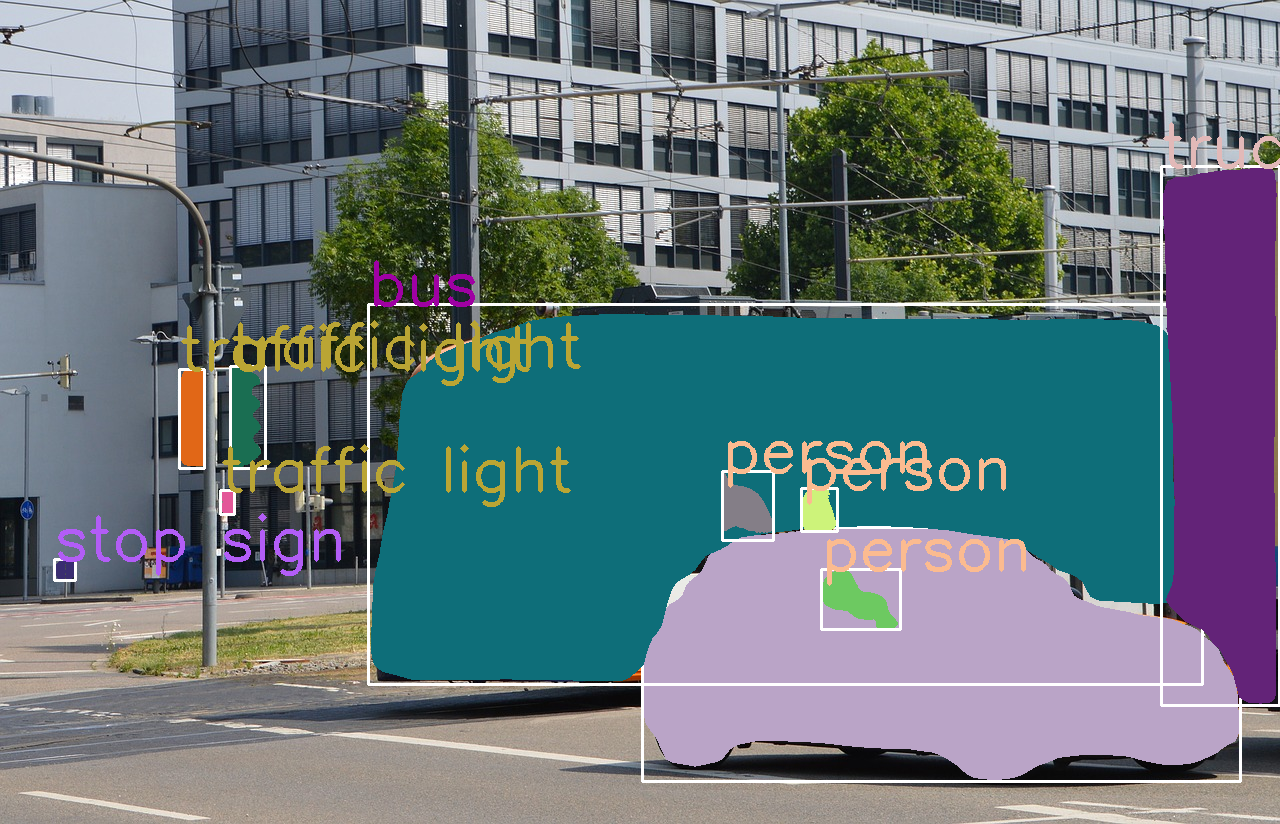

In [7]:
import numpy as np

def draw_segmentation_masks(img: np.array, segm_objects: dict):
    """Draw bounding boxes and segmentation masks"""
    # COCO dataset class names
    classes = [
        'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
        'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
        'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
        'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
        'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
        'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
        'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
        'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
        'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
        'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']

    # random color for each class

    colors = np.random.uniform(0, 255, size=(len(classes), 3))

    # iterate over the network output for all segmentation masks and boxes
    for mask, box, score, box_class in zip(segm_objects[0]['masks'].detach().numpy(),
                                           segm_objects[0]['boxes'].detach().numpy().astype(int),
                                           segm_objects[0]['scores'].detach().numpy(),
                                           segm_objects[0]['labels'].detach().numpy()):

        # filter the boxes by objectness score
        if score > 0.5:
            # transform bounding box format
            box = [(box[0], box[1]), (box[2], box[3])]

            # select class color
            color = colors[box_class]

            # overlay the segmentation mask on the image with random color
            img[(mask > 0.5).squeeze(), :] = np.random.uniform(0, 255, size=3)

            # draw the bounding box
            cv2.rectangle(img=img,
                          pt1=box[0],
                          pt2=box[1],
                          color=(255, 255, 255),
                          thickness=2)

            # display the box class label
            cv2.putText(img=image,
                        text=classes[box_class],
                        org=box[0],
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=2,
                        color=color,
                        thickness=4)

draw_segmentation_masks(image, segmented_objects)

from google.colab.patches import cv2_imshow
cv2_imshow(image)